# Занятие 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Оценка распределений

### Дискретное

In [2]:
N = 10000
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([5, 2, 4, ..., 4, 5, 6])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[1680 1665 1676 1664 1674 1641]
[0.168  0.1665 0.1676 0.1664 0.1674 0.1641]
[1 2 3 4 5 6]
1.0


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 3 4 6]
10: [0.2 0.3 0.2 0.3] 1.0
[1 2 3 4 5 6]
100: [0.13 0.19 0.17 0.14 0.2  0.17] 1.0
[1 2 3 4 5 6]
1000: [0.158 0.175 0.167 0.182 0.16  0.158] 1.0
[1 2 3 4 5 6]
10000: [0.1684 0.166  0.1665 0.1666 0.1681 0.1644] 1.0
[1 2 3 4 5 6]
100000: [0.1669  0.16853 0.16689 0.165   0.16533 0.16735] 1.0


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [6]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
#sample

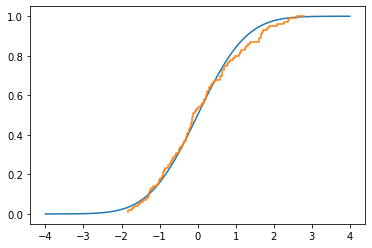

In [7]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 6. 13. 14. 20. 14. 11.  8.  7.  3.  4.]


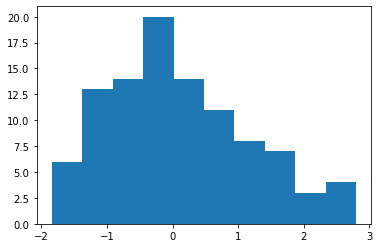

In [8]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample, )
print(b)

In [9]:
len(n)

11

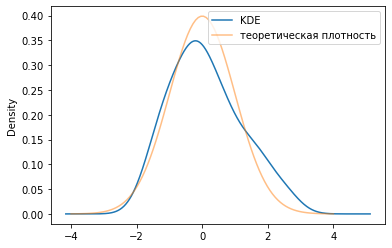

In [10]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [11]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([-1.13729595e+00,  1.33866474e+00, -4.29401998e-01, -1.49332102e+00,
       -5.73589055e-02, -1.26192565e+00, -3.90280541e-01,  1.15883334e+00,
        8.31834300e-01, -3.44646958e-01,  7.28368597e-01, -2.21891615e-01,
       -2.22844538e-01,  1.18874540e+00,  2.70911163e+00, -3.97637600e-02,
        8.82000794e-01, -2.36147130e+00,  3.08975617e-01,  2.25615693e-02,
       -3.42814334e-01,  2.20461071e+00, -2.27551166e-01,  1.17372834e+00,
       -2.00284242e+00, -4.26315247e-01, -2.99547435e-01, -7.90909371e-01,
       -3.48967184e-01, -1.36564255e+00,  2.16939886e+00, -8.31050370e-01,
       -2.91343067e-01, -1.60244394e+00,  9.95539530e-01,  8.03846829e-01,
        9.15944969e-01,  1.02777882e-01,  1.03098831e-01, -1.07055507e+00,
       -7.37376505e-02, -1.63317330e-01, -5.79487577e-02, -9.26684699e-01,
        2.20365482e-01,  1.59194943e+00,  2.28005614e+00, -3.31296661e-01,
        2.21595110e+00,  4.65542824e-02, -8.37413654e-01,  8.76328148e-03,
       -1.60986363e+00,  

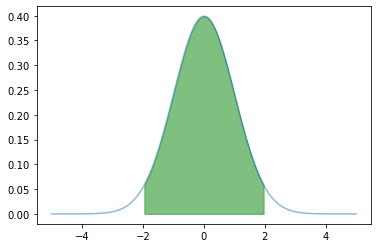

In [12]:
x = np.linspace(-5,5,10000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [13]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [14]:
norm_rv.ppf(0.5)

0.0

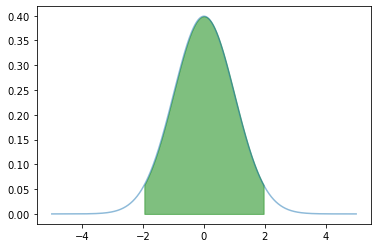

In [15]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

In [16]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут


Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

In [17]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.75407308, 3.84826485, 1.21104772, 2.9674852 , 3.77968566,
       1.78732221, 3.92744021, 2.66516086, 1.4023028 , 2.907252  ])

In [18]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.0184339 , 0.        , 0.        , 0.00921695, 0.0184339 ,
        0.05530171, 0.10138647, 0.07373561, 0.11060342, 0.19355599,
        0.25807465, 0.25807465, 0.37789502, 0.63596967, 0.8387426 ,
        1.03229859, 1.11525115, 1.41019361, 1.81573948, 2.10146499,
        2.39640744, 2.7282177 , 3.16141443, 3.36418737, 3.69599763,
        3.76973324, 4.34118425, 4.62690975, 4.86655049, 4.5992589 ,
        4.53474023, 4.28588254, 4.04624179, 4.23058083, 3.73286544,
        3.60382811, 3.08767882, 2.76508551, 2.54387867, 2.39640744,
        2.00929547, 1.6221835 , 1.14290201, 1.04151554, 0.74657309,
        0.5530171 , 0.5345832 , 0.42397978, 0.2488577 , 0.23964074,
        0.12903732, 0.13825428, 0.03686781, 0.04608476, 0.02765086,
        0.        , 0.0184339 , 0.        , 0.        , 0.00921695]),
 array([2.17869092, 2.18954049, 2.20039007, 2.21123964, 2.22208921,
        2.23293879, 2.24378836, 2.25463794, 2.26548751, 2.27633708,
        2.28718666, 2.29803623, 2.30888581, 2.

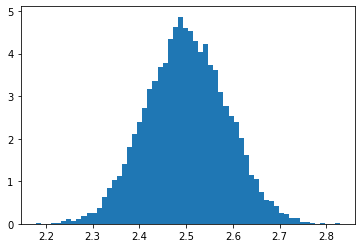

In [19]:
plt.hist(means, density=True, bins='auto')

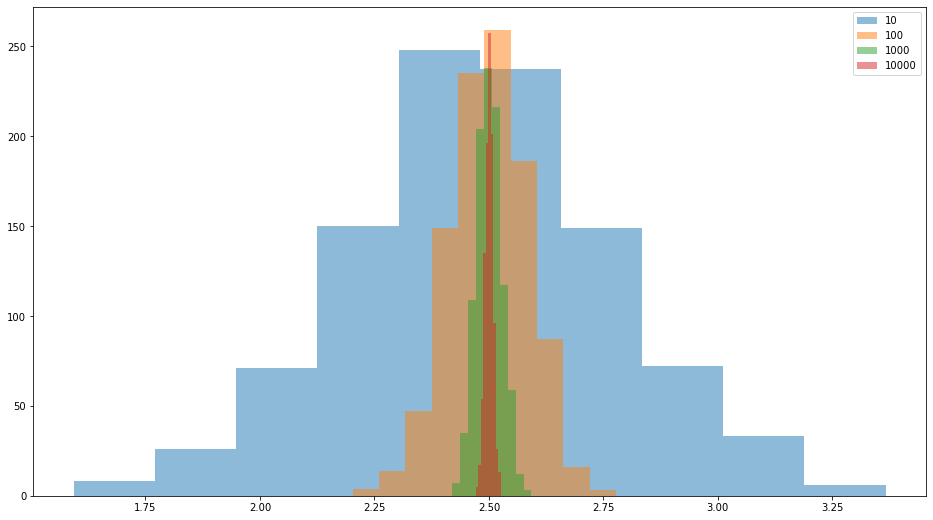

In [20]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [21]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [22]:
uniform_rv.mean()

2.5

In [23]:
uniform_rv.var()

0.75

In [24]:
uniform_rv.std()

0.8660254037844386

[]

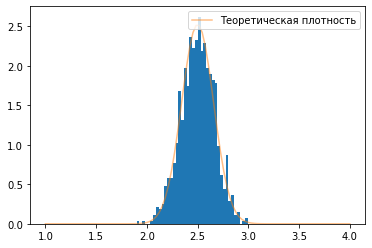

In [25]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [26]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * uniform_rv.std() / np.sqrt(N), np.mean(data) + 2 * uniform_rv.std() / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.0916966037989404, 2.7241521358326164] 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [27]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([4, 9, 8, 9, 6, 6, 7, 6, 6, 7])

Text(0.5, 0, '$x$')

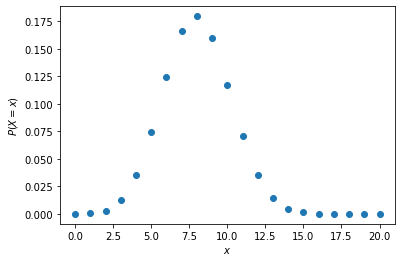

In [28]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

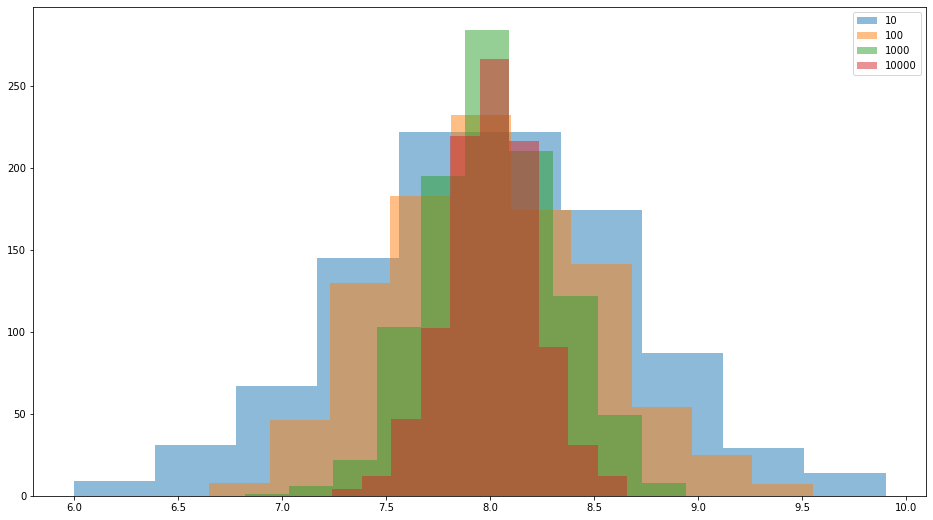

In [29]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [30]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 0, '$x$')

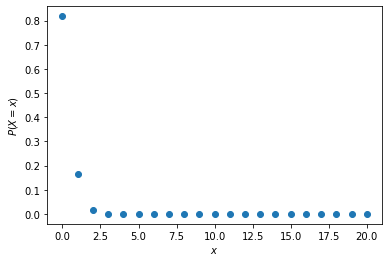

In [31]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

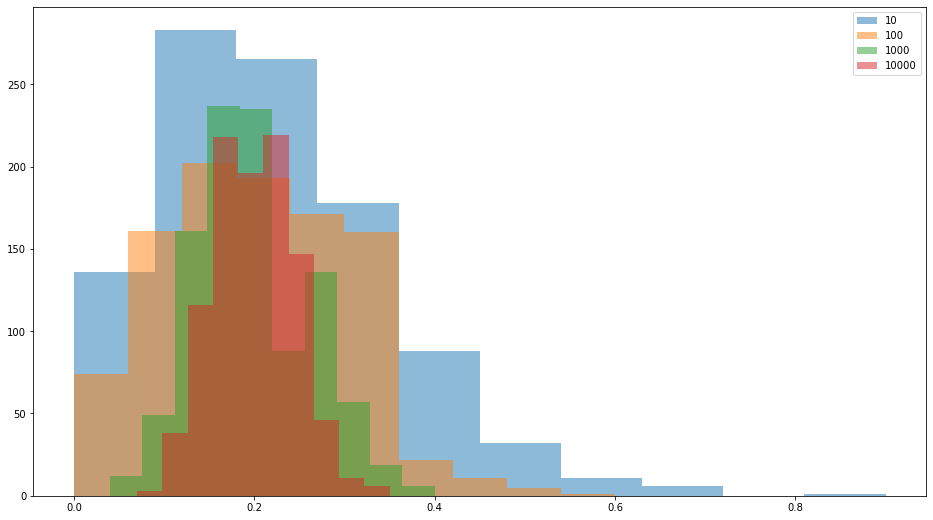

In [32]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()